# 3 - Perfectly Matched Layer (PML)

# 3.1 - Introduction

In this notebook, we describe the *Perfectly Matched Layer* method, originally proposed by Berenger for electromagnetic waves, a scheme also employing an absorbing layer to reduce the wave reflections coming from the computational boundaries. This method is one of the most efficient schemes for this purpose. The formulation that we present here, designed for the wave equation in the form of a second order equation (instead of its formulation as a first order system), is proposed by Grote and Sim. 

We will use all the previous setups employed in the notebooks <a href="01_introduction.ipynb">Introduction to Acoustic Problem</a> and <a href="02_damping.ipynb">Damping</a>, detailing only the new features specific to the
PML method.

# 3.2 - Acoustic Problem with PML

We again use an extended spatial domain $\Omega=\left[x_{I}-L_{x},x_{F}+L_{x}\right] \times\left[z_{I},z_{F}+L_{z}\right]$, with an absorption region as depicted in blue in the figure below.
In the PML scheme, two auxiliary functions are included, which will provide adequate damping of the wave reflections. The design of the method is such that it would ideally suppress all the reflections in a continuous setting, but since we employ a finite difference discretization some reflections remain, although strongly attenuated.

<img src='domain2.png' width=500>

The set of equations for the acoustic wave equation with PML, including the auxiliary functions, is given by:

\begin{eqnarray}
        \frac{\partial^2 u(x,z,t)}{\partial t^2}
        + (\zeta_1(x,z)+\zeta_2(x,z))\frac{\partial u(x,z,t)}{\partial t}
	+ \zeta_1(x,z) \zeta_2(x,z) u(x,z,t)& = & \\
	 c^2(x,z)\Delta u(x,z,t) 
	+\frac{\partial \phi_1(x,z,t)}{\partial x}+ 
	\frac{\partial \phi_2(x,z,t)}{\partial z}+  f(x,z,t) & &
\end{eqnarray}

\begin{equation}
        \frac{\partial \phi_1(x,z,t)}{\partial t} =
        - \zeta_1(x,z)\phi_1(x,z,t)+c^2(x,z)(\zeta_2(x,z)-\zeta_1(x,z))
        \frac{\partial u(x,z,t)}{\partial x}
\end{equation}

\begin{equation}
        \frac{\partial \phi_2(x,z,t)}{\partial t} =
        - \zeta_2(x,z)\phi_2(x,z,t)+c^2(x,z)(\zeta_1(x,z)-\zeta_2(x,z))
        \frac{\partial u(x,z,t)}{\partial y}
\end{equation}

where $u(x,z,t):D\rightarrow \mathbb{R}$ is the wave displacement,  $f(x,z,t)$ is the source term, $c(x,z)$ is the wave speed and $\phi_{1}(x,z)$ and $\phi_{2}(x,z)$ are the auxiliary variables, which will be non zero only in the absorption region. The damping functions $\zeta_1(x,z)$ and $\zeta_2(x,z)$ will be defined as in the Damping notebook. The initial and outer boundary conditions for the displacement $u$ are the same as in the previous notebooks. The auxiliary functions will also be kept equal to zero in all the outer boundary of
$\Omega$. The Ricker source term is defined as before.


# 3.3 - Finite Difference Operators and Discretization of Spatial and Temporal Domains

We employ the same methods as in the previous notebooks.

# 3.4 - *Staggered* e *non-staggered* variables

We consider the PML on the staggered grid. 

The staggered spatial domain is $\Omega^{x,y}_\Delta=\{(x_{i+1/2},z_{j+1/2}, i=0,\cdots,nx-1,\ j=0,\cdots,nz-1\}, \mbox{ with } x_{i+1/2}=(i+\frac{1}{2})\Delta x \mbox{ and } z_{j+1/2}=(j+\frac{1}{2})\Delta z$. Some variables will also be staggered in time, being defined
at intermediary time instantes $t_{k+1/2}=t_k+\Delta t$.


In the formulation of PML that is described here, we will define the variables as follows:

- The variable $u(x,z,t)$ is a *non-staggered* variable;
- The variables $\phi_{1}(x,z,t)$ and $\phi_{2}(x,z,t)$ are *staggered* variables;
- The functions $\zeta_{1}(x,z)$, $\zeta_{2}(x,z)$, $c(x,z)$ and $f(x,z,t)$ will be used as *staggered* or *non-staggered* variables depending on the equation in which they are required.

The direct implication of *staggered* and *non-staggered* variables appearing in the same equation is that:

- When updating $u(x,z,t)$ we average the neighboring values of $\phi_{1}(x,z,t)$ and $\phi_{2}(x,z,t)$ in order to define them on the non-staggered grid. 

- When updating $\phi_{1}(x,z,t)$ and $\phi_{2}(x,z,t)$ we average the neighboring values of $u(x,z,t)$ in order to define them on the staggered grid.

The calculation of these averages will be explicit when we write the equations in the Devito code.

# 3.5 - Standard Problem

Recall the Standard Problem definitions discussed on the notebook <a href="01_introduction.ipynb">Introduction to Acoustic Problem</a> we have that:

- $x_{I}$ =  0.0 Km;
- $x_{F}$ =  1.0 Km = 1000 m;
- $z_{I}$ =  0.0 Km;
- $z_{F}$ =  1.0 Km = 1000 m;

The spatial discretization parameters are given by:
- $\Delta x$ = 0.01 km = 10m;
- $\Delta z$ = 0.01 km = 10m;

Let's consider a $I$ the time domain with the following limitations:

- $t_{I}$ = 0 s = 0 ms;
- $t_{F}$ = 1 s = 1000 ms;

The temporal discretization parameters are given by:

- $\Delta t$ $\approx$ 0.0016 s = 1.6 ms;
- $NT$ = 626.

The source term, velocity model and positioning of receivers will be as in the previous notebooks.

# 3.6 - Damping Functions



We choose the pair of functions $\zeta_{1}(x,z)$ and $\zeta_{2}(x,z)$ as in the  <a href="02_damping.ipynb">Damping</a> notebook. They will act in the directions $x$ and $z$, respectively.

# 3.7 - Numerical Simulations

For this notebook's numerical simulations, we use several parts the notebook codes <a href="02_damping.ipynb">Damping</a>. We will highlight only the significant changes and comment on the most relevant operations since the computational structure of the acoustic equation with PML is very similar to the case of the acoustic equation with Damping.

We import the following Python and Devito packages:

In [1]:
# NBVAL_IGNORE_OUTPUT

import numpy                   as np
import matplotlib.pyplot       as plot
import math                    as mt
import matplotlib.ticker       as mticker    
from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   matplotlib              import cm

From Devito's library of examples we import the following structures:

In [2]:
# NBVAL_IGNORE_OUTPUT

%matplotlib inline
from   examples.seismic  import TimeAxis
from   examples.seismic  import RickerSource
from   examples.seismic  import Receiver
from   devito            import SubDomain, Grid, NODE, TimeFunction, Function, Eq, solve, Operator

The mesh parameters that we choose define the domain $\Omega_{0}$ plus the absorption region. For this, we use the following data:

In [3]:
nptx   =  101
nptz   =  101
x0     =  0.
x1     =  1000. 
compx  =  x1-x0
z0     =  0.
z1     =  1000.
compz  =  z1-z0;
hxv    =  (x1-x0)/(nptx-1)
hzv    =  (z1-z0)/(nptz-1)

The number of points of the absorption layer in the directions $x$ and $z$ are given, respectively, by:

In [4]:
npmlx  = 20
npmlz  = 20

The lengths $L_{x}$ and $L_{z}$ are given, respectively, by:

In [5]:
lx = npmlx*hxv
lz = npmlz*hzv

We define the *grid*:

In [6]:
nptx   =  nptx + 2*npmlx
nptz   =  nptz + 1*npmlz
x0     =  x0 - hxv*npmlx
x1     =  x1 + hxv*npmlx
compx  =  x1-x0
z0     =  z0
z1     =  z1 + hzv*npmlz
compz  =  z1-z0
origin  = (x0,z0)
extent  = (compx,compz)
shape   = (nptx,nptz)
spacing = (hxv,hzv)

As in the case of the Damping acoustic equation, we can here split the computations in the two subdomains:

- In the blue region:

\begin{eqnarray}
        \frac{\partial^2 u(x,z,t)}{\partial t^2}
        + (\zeta_1(x,z)+\zeta_2(x,z))\frac{\partial u(x,z,t)}{\partial t}
	+ \zeta_1(x,z) \zeta_2(x,z) u(x,z,t)& = & \\
	 c^2(x,z)\Delta u(x,z,t) 
	+\frac{\partial \phi_1(x,z,t)}{\partial x}+ 
	\frac{\partial \phi_2(x,z,t)}{\partial z}+  f(x,z,t) & &
\end{eqnarray}

\begin{equation}
        \frac{\partial \phi_1(x,z,t)}{\partial t} =
        - \zeta_1(x,z)\phi_1(x,z,t)+c^2(x,z)(\zeta_2(x,z)-\zeta_1(x,z))
        \frac{\partial u(x,z,t)}{\partial x}
\end{equation}

\begin{equation}
        \frac{\partial \phi_2(x,z,t)}{\partial t} =
        - \zeta_2(x,z)\phi_2(x,z,t)+c^2(x,z)(\zeta_1(x,z)-\zeta_2(x,z))
        \frac{\partial u(x,z,t)}{\partial y}
\end{equation}

- In the white region:

\begin{equation}
u(x,z,t)_{tt}-c^2(x,z)\Delta(u(x,z,t))=c^2(x,z)f(x,z,t).
\end{equation}

We use the structure of the *subdomains* to represent the white region and the blue region.

First, we define the white region, naming it as *d0

In [7]:
class d0domain(SubDomain):
    name = 'd0'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('middle', npmlx, npmlx), z: ('middle', 0, npmlz)}
d0_domain = d0domain()

The blue region is the union of 3 subdomains:


In [8]:
class d1domain(SubDomain):
    name = 'd1'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('left',npmlx), z: z}
d1_domain = d1domain()

class d2domain(SubDomain):
    name = 'd2'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('right',npmlx), z: z}
d2_domain = d2domain()

class d3domain(SubDomain):
    name = 'd3'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('middle', npmlx, npmlx), z: ('right',npmlz)}
d3_domain = d3domain()

The figure below represents the division of domains that we did previously:

<img src='domain3.png' width=500>

The *spatial grid* is then defined:

In [9]:
grid = Grid(origin=origin, extent=extent, shape=shape, subdomains=(d0_domain,d1_domain,d2_domain,d3_domain), dtype=np.float64)

The velocity field is needed in both staggered and non-staggered grids. As before we, read the file and interpolate it to the non-staggered grid. From these values, we interpolate to the staggered grid.

In [10]:
v0 = np.zeros((nptx,nptz))
v1 = np.zeros((nptx-1,nptz-1))
X0 = np.linspace(x0,x1,nptx)
Z0 = np.linspace(z0,z1,nptz)
    
x10 = x0+lx
x11 = x1-lx
        
z10 = z0
z11 = z1 - lz

xm = 0.5*(x10+x11)
zm = 0.5*(z10+z11)
        
pxm = 0
pzm = 0
        
for i in range(0,nptx):
    if(X0[i]==xm): pxm = i
            
for j in range(0,nptz):
    if(Z0[j]==zm): pzm = j
            
p0 = 0    
p1 = pzm
p2 = nptz
v0[0:nptx,p0:p1] = 1.5
v0[0:nptx,p1:p2] = 2.5

p0 = 0    
p1 = pzm
p2 = nptz-1
v1[0:nptx-1,p0:p1] = 1.5
v1[0:nptx-1,p1:p2] = 2.5

Previously we introduced the local variables *x10,x11,z10,z11,xm,zm,pxm* and *pzm* that help us to create a specific velocity field, where we consider the whole domain (including the absorpion region). Below we include a routine to plot the velocity field.

In [11]:
def graph2dvel(vel):
        plot.figure()
        plot.figure(figsize=(16,8))
        fscale =  1/10**(3)
        scale  = np.amax(vel[npmlx:-npmlx,0:-npmlz])
        extent = [fscale*(x0+lx),fscale*(x1-lx), fscale*(z1-lz), fscale*(z0)]
        fig = plot.imshow(np.transpose(vel[npmlx:-npmlx,0:-npmlz]), vmin=0.,vmax=scale, cmap=cm.seismic, extent=extent)
        plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
        plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
        plot.title('Velocity Profile')
        plot.grid()
        ax = plot.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plot.colorbar(fig, cax=cax, format='%.2e')
        cbar.set_label('Velocity [km/s]')
        plot.show()

Below we include the plot of velocity field.

<Figure size 576x432 with 0 Axes>

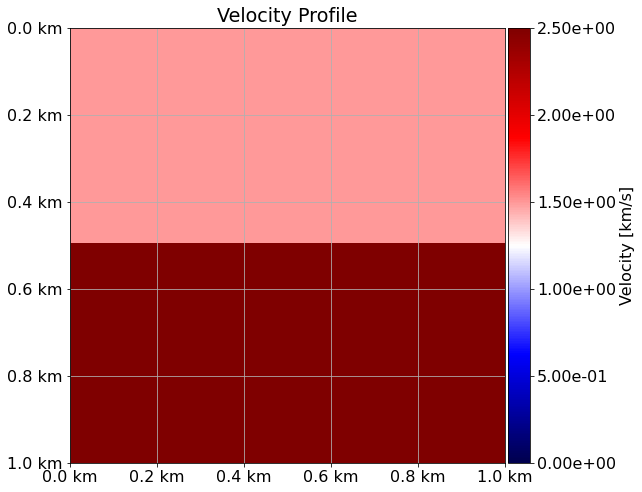

In [12]:
# NBVAL_IGNORE_OUTPUT

graph2dvel(v0)

We then define the temporal properties:

In [13]:
t0    = 0.
tn    = 1000.   
CFL   = 0.4
vmax  = np.amax(v0) 
dtmax = np.float64((min(hxv,hzv)*CFL)/(vmax))
ntmax = int((tn-t0)/dtmax)+1
dt0   = np.float64((tn-t0)/ntmax)

In [14]:
time_range = TimeAxis(start=t0,stop=tn,num=ntmax+1)
nt         = time_range.num - 1

The symbolic values associated with the spatial and temporal grids that are used in the composition of the equations are given by:

In [15]:
(hx,hz) = grid.spacing_map  
(x, z)  = grid.dimensions     
t       = grid.stepping_dim
dt      = grid.stepping_dim.spacing

We set the parameters for the Ricker source:  

In [16]:
f0      = 0.01
nsource = 1
xposf   = 0.5*(compx-2*npmlx*hxv)
zposf   = hzv

In [17]:
src = RickerSource(name='src',grid=grid,f0=f0,npoint=nsource,time_range=time_range,staggered=NODE,dtype=np.float64)
src.coordinates.data[:, 0] = xposf
src.coordinates.data[:, 1] = zposf

Below we include the plot of Ricker source.

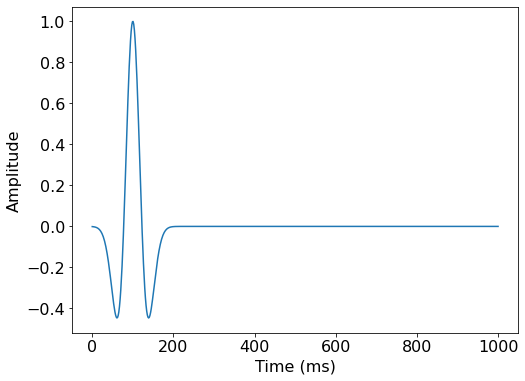

In [18]:
# NBVAL_IGNORE_OUTPUT

src.show()

For the receivers:  

In [19]:
nrec   = nptx
nxpos  = np.linspace(x0,x1,nrec)
nzpos  = hzv

In [20]:
rec = Receiver(name='rec',grid=grid,npoint=nrec,time_range=time_range,staggered=NODE,dtype=np.float64)
rec.coordinates.data[:, 0] = nxpos
rec.coordinates.data[:, 1] = nzpos

The displacement field *u* is allocated 

In [21]:
u = TimeFunction(name="u",grid=grid,time_order=2,space_order=2,staggered=NODE,dtype=np.float64)

The auxiliary functions $\phi_{1}(x,z,t)$ and $\phi_{2}(x,z,t)$ will be two fields of second order in time and space, which use points of type *staggered*. 

In [22]:
phi1 = TimeFunction(name="phi1",grid=grid,time_order=2,space_order=2,staggered=(x,z),dtype=np.float64)
phi2 = TimeFunction(name="phi2",grid=grid,time_order=2,space_order=2,staggered=(x,z),dtype=np.float64)

We set the velocity on the non-staggered grid

In [23]:
vel0 = Function(name="vel0",grid=grid,space_order=2,staggered=NODE,dtype=np.float64)
vel0.data[:,:] = v0[:,:]

and on the staggered one. Notice that the field has one less point in each direction.

In [24]:
vel1 = Function(name="vel1", grid=grid,space_order=2,staggered=(x,z),dtype=np.float64)
vel1.data[0:nptx-1,0:nptz-1] = v1

Taking into account the dimension of the array *v1* and the dimension of the field *vel1* we will complete the line *nptx-1* with information from the line *nptx-2* and the column *nptz-1* with information from the column *nptz-2*, information from the *v1* array. This copy of information does not alter the properties of the *vel1* velocity field in view of its structure of constant profiles on the part. Copying information is done by the following sequence of commands:

In [25]:
vel1.data[nptx-1,0:nptz-1] = vel1.data[nptx-2,0:nptz-1]
vel1.data[0:nptx,nptz-1]   = vel1.data[0:nptx,nptz-2]

We set the source term and receivers

In [26]:
src_term = src.inject(field=u.forward,expr=src*dt**2*vel0**2)

In [27]:
rec_term = rec.interpolate(expr=u)

The next step is to create the structures that reproduce the functions $\zeta_{1}(x,z)$ and $\zeta_{2}(x,z)$ and then assign these functions to fields in *non-staggered* and *staggered* grids.

We define the region $\Omega_{0}$ by choosing the values of *x0pml* and *x1pml* in the direction $x$ and *z0pml* and *z1pml* in the direction $z$. These points satisfy the following relations with the lengths $L_{x}$ and $L_{z}$:

- x0pml = x0 + $L_{x}$;
- x1pml = x1 - $L_{x}$;
- z0pml = z0;
- z1pml = z1 - $L_{z}$;

In terms of program variables, we have the following definitions:

In [28]:
x0pml  = x0 + npmlx*hxv 
x1pml  = x1 - npmlx*hxv 
z0pml  = z0            
z1pml  = z1 - npmlz*hzv 

Having set the boundaries of $\Omega$, we create a function *fdamp*, which represents $\zeta_{1}(x,z)$ (when $i=1$) and $\zeta_{2}(x,z)$ (when $i=2$). 

In [29]:
def fdamp(x,z,i):
    
    quibar  = 0.05
          
    if(i==1):
        a = np.where(x<=x0pml,(np.abs(x-x0pml)/lx),np.where(x>=x1pml,(np.abs(x-x1pml)/lx),0.))
        fdamp = quibar*(a-(1./(2.*np.pi))*np.sin(2.*np.pi*a))
    if(i==2):
        a = np.where(z<=z0pml,(np.abs(z-z0pml)/lz),np.where(z>=z1pml,(np.abs(z-z1pml)/lz),0.))
        fdamp = quibar*(a-(1./(2.*np.pi))*np.sin(2.*np.pi*a))
      
    return fdamp

We created the damping function that represents $\zeta_{1}(x,z)$ and $\zeta_{2}(x,z)$. We now define arrays with the damping function values on grid points (staggered and non-staggered): c

- The arrays *D01* and *D02* are associated with points of type *staggered* and represent the functions $\zeta_{1}(x,z)$ and $\zeta_{2}(x,z)$, respectively. 

- The arrays *D11* and *D12* are associated with points of type *non-staggered* and represent the functions $\zeta_{1}(x,z)$ and $\zeta_{2}(x,z)$, respectively. 


In [30]:
def generatemdamp():
    
    X0     = np.linspace(x0,x1,nptx)    
    Z0     = np.linspace(z0,z1,nptz)
    X0grid,Z0grid = np.meshgrid(X0,Z0)
    X1   = np.linspace((x0+0.5*hxv),(x1-0.5*hxv),nptx-1)
    Z1   = np.linspace((z0+0.5*hzv),(z1-0.5*hzv),nptz-1)
    X1grid,Z1grid = np.meshgrid(X1,Z1)
   
    D01 = np.zeros((nptx,nptz))
    D02 = np.zeros((nptx,nptz))
    D11 = np.zeros((nptx,nptz))
    D12 = np.zeros((nptx,nptz))
    
    D01 = np.transpose(fdamp(X0grid,Z0grid,1))
    D02 = np.transpose(fdamp(X0grid,Z0grid,2))
  
    D11 = np.transpose(fdamp(X1grid,Z1grid,1))
    D12 = np.transpose(fdamp(X1grid,Z1grid,2))
    
    return D01, D02, D11, D12

In [31]:
D01, D02, D11, D12 = generatemdamp();

Below we include a routine to plot the damping fields.

In [32]:
def graph2damp(D):     
    plot.figure()
    plot.figure(figsize=(16,8))
    fscale = 1/10**(-3)
    fscale = 10**(-3)
    scale  = np.amax(D)
    extent = [fscale*x0,fscale*x1, fscale*z1, fscale*z0]
    fig = plot.imshow(np.transpose(D), vmin=0.,vmax=scale, cmap=cm.seismic, extent=extent)
    plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.title('Absorbing Layer Function')
    plot.grid()
    ax = plot.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plot.colorbar(fig, cax=cax, format='%.2e')
    cbar.set_label('Damping')
    plot.show()

Below we include the plot of damping field in $x$ direction.

<Figure size 576x432 with 0 Axes>

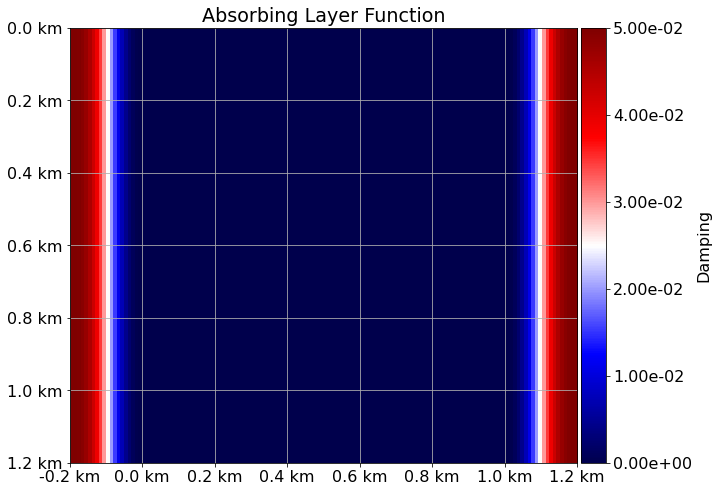

In [33]:
# NBVAL_IGNORE_OUTPUT

graph2damp(D01)

Below we include the plot of damping field in $z$ direction.

<Figure size 576x432 with 0 Axes>

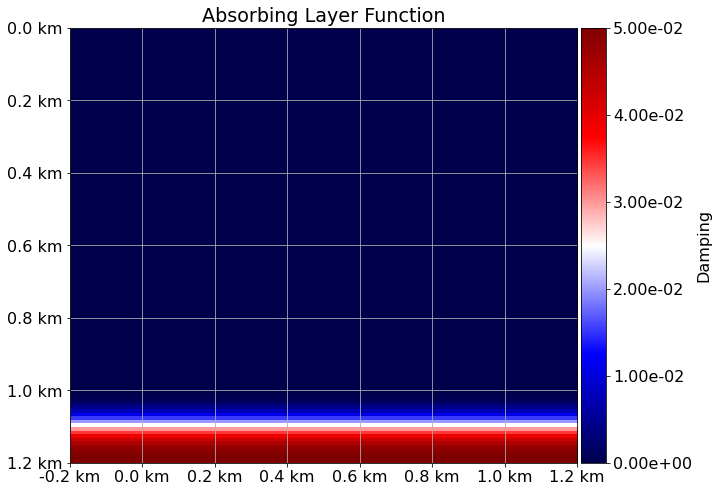

In [34]:
# NBVAL_IGNORE_OUTPUT

graph2damp(D02)

As pointed out previously, the functions $\zeta_{1}(x,z)$ and $\zeta_{2}(x,z)$ define  damping in the directions $x$ and $z$ respectively. They will be identified  with the symbolic names of *dampx* and *dampz*, respectively.

As damping acts on non-staggered and staggered grids, we will identify *dampx0* and *dampz0* as being damping on the non-staggered points grid. Similarly, we will identify *dampx1* and *dampz1* as being the damping on the staggered points grid.

In [35]:
dampx0 = Function(name="dampx0", grid=grid,space_order=2,staggered=NODE ,dtype=np.float64)
dampz0 = Function(name="dampz0", grid=grid,space_order=2,staggered=NODE ,dtype=np.float64)
dampx0.data[:,:] = D01
dampz0.data[:,:] = D02

In [36]:
dampx1 = Function(name="dampx1", grid=grid,space_order=2,staggered=(x,z),dtype=np.float64)
dampz1 = Function(name="dampz1", grid=grid,space_order=2,staggered=(x,z),dtype=np.float64)
dampx1.data[0:nptx-1,0:nptz-1] = D11
dampz1.data[0:nptx-1,0:nptz-1] = D12

In terms of dimensions, the arrays *D11* and *D12* have dimension $(nptx-1)\times (nptz-1)$. As our grid has $nptx\times nptz$ points, so we complete the line *nptx-1* with information from the line *nptx-2* and the column *nptz-1* with information from the column *nptz-2*, in fields *dampx1* and *dampz1* using the arrays *D11* and *D12*, respectively.

In [37]:
dampx1.data[nptx-1,0:nptz-1]   = dampx1.data[nptx-2,0:nptz-1]
dampx1.data[0:nptx,nptz-1]     = dampx1.data[0:nptx,nptz-2]
dampz1.data[nptx-1,0:nptz-1]   = dampz1.data[nptx-2,0:nptz-1]
dampz1.data[0:nptx,nptz-1]     = dampz1.data[0:nptx,nptz-2]

As we saw previously, the acoustic equation with PML has the formulations


 In the white (interior) region:

- eq1 = u.dt2 - vel0 * vel0 * u.laplace;

 And in the blue (absorption) region:

- eq2  = u.dt2 + (dampx0+dampz0) * u.dtc + (dampx0 * dampz0) * u - u.laplace * vel0 * vel0 + $\bar{phi1}$[t,x,z] + $\bar{phi2}$[t,x,z];

- eq3 = phi1.dt + dampx1 * 0.5 * (phi1.forward+phi1) -(dampz1-dampx1) * $\bar{u}$[t,x,z] * vel1 * vel1

- eq4 = phi2.dt + dampz1 * 0.5 * (phi2.forward+phi2) -(dampx1-dampz1) * $\bar{u}$[t,x,z] * vel1 * vel1

In the equation *eq2* the term $\bar{phi1}$[t,x,z] is given by following expression:

- -(0.5/hx) * (phi1[t,x,z-1]+phi1[t,x,z]-phi1[t,x-1,z-1]-phi1[t,x-1,z]);

And the term $\bar{phi2}$[t,x,z] in the equation *eq2* is given by:

-  -(0.5/hz) * (phi2[t,x-1,z]+phi2[t,x,z]-phi2[t,x-1,z-1]-phi2[t,x,z-1]);

In the equation *eq3* the term $\bar{u}$[t,x,z] is given by:

- a1 = u[t+1,x+1,z] + u[t+1,x+1,z+1] - u[t+1,x,z] - u[t+1,x,z+1]; 
- a2 = u[t,x+1,z]   + u[t,x+1,z+1]   - u[t,x,z]   - u[t,x,z+1]; 
- $\bar{u}$[t,x,z] = 0.5 * (0.5/hx) * (a1+a2);

In the equation *eq4* the term $\bar{u}$[t,x,z] is given by:

- b1 = u[t+1,x,z+1] + u[t+1,x+1,z+1] - u[t+1,x,z] - u[t+1,x+1,z]; 
- b2 = u[t,x,z+1]   + u[t,x+1,z+1]   - u[t,x,z]   - u[t,x+1,z]; 
-  $\bar{u}$[t,x,z] = 0.5 * (0.5/hz) * (b1+b2)

Then, using the operator *Eq(eq)* and the equation in the format associated with Devito we create the *pdes* that represent the acoustic equations with PML without the external force term in the white and blue regions, respectively by:

In [38]:
# White Region
pde01   = Eq(u.dt2-u.laplace*vel0**2) 

# Blue Region
pde02a  = u.dt2   + (dampx0+dampz0)*u.dtc + (dampx0*dampz0)*u - u.laplace*vel0*vel0 
pde02b  = - (0.5/hx)*(phi1[t,x,z-1]+phi1[t,x,z]-phi1[t,x-1,z-1]-phi1[t,x-1,z])
pde02c  = - (0.5/hz)*(phi2[t,x-1,z]+phi2[t,x,z]-phi2[t,x-1,z-1]-phi2[t,x,z-1])
pde02   = Eq(pde02a + pde02b + pde02c)

pde10 = phi1.dt + dampx1*0.5*(phi1.forward+phi1)
a1    = u[t+1,x+1,z] + u[t+1,x+1,z+1] - u[t+1,x,z] - u[t+1,x,z+1] 
a2    = u[t,x+1,z]   + u[t,x+1,z+1]   - u[t,x,z]   - u[t,x,z+1] 
pde11 = -(dampz1-dampx1)*0.5*(0.5/hx)*(a1+a2)*vel1**2
pde1  = Eq(pde10+pde11)
                                                    
pde20 = phi2.dt + dampz1*0.5*(phi2.forward+phi2) 
b1    = u[t+1,x,z+1] + u[t+1,x+1,z+1] - u[t+1,x,z] - u[t+1,x+1,z] 
b2    = u[t,x,z+1]   + u[t,x+1,z+1]   - u[t,x,z]   - u[t,x+1,z] 
pde21 = -(dampx1-dampz1)*0.5*(0.5/hz)*(b1+b2)*vel1**2
pde2  = Eq(pde20+pde21)

Now we define the *stencils* for each of the *pdes* that we created previously. The *pde01* is defined on *subdomain* *d0*. 

In [39]:
stencil01 =  Eq(u.forward,solve(pde01,u.forward) ,subdomain = grid.subdomains['d0'])

The *pdes*: *pde02*, *pde1* and *pde2* are defined on the union of the subdomains *d1*, *d2* and *d3*. 

In [40]:
subds = ['d1','d2','d3']

In [41]:
stencil02 = [Eq(u.forward,solve(pde02, u.forward),subdomain = grid.subdomains[subds[i]]) for i in range(0,len(subds))]
stencil1 = [Eq(phi1.forward, solve(pde1,phi1.forward),subdomain = grid.subdomains[subds[i]]) for i in range(0,len(subds))]
stencil2 = [Eq(phi2.forward, solve(pde2,phi2.forward),subdomain = grid.subdomains[subds[i]]) for i in range(0,len(subds))]

The boundary conditions  are set

In [42]:
bc  = [Eq(u[t+1,0,z],0.),Eq(u[t+1,nptx-1,z],0.),Eq(u[t+1,x,nptz-1],0.),Eq(u[t+1,x,0],u[t+1,x,1])]

We then define the operator (*op*) that will join the acoustic equation, source term, boundary conditions and receivers.

- 1. The acoustic wave equation in the *d0* region: *[stencil01];*
- 2. The acoustic wave equation in the *d1*, *d2* and *d3* regions: *[stencil02];*
- 3. Source term: *src_term;*
- 4. Boundary Condition: *bc;*
- 5. Auxiliary function $\phi_{1}(x,z,t)$ in the *d1*, *d2* and *d3* regions: *[stencil1];*
- 6. Auxiliary function $\phi_{2}(x,z,t)$ in the *d1*, *d2* and *d3* regions: *[stencil2];*
- 7. Receivers: *rec_term;*

We then define the following *op*:

In [43]:
# NBVAL_IGNORE_OUTPUT

op = Operator([stencil01,stencil02] + src_term + bc + [stencil1,stencil2] + rec_term,subs=grid.spacing_map)

So that there are no residuals in the variables of interest, we reset the fields *u*, *phi1* and *phi2* as follows:

In [44]:
u.data[:]     = 0.
phi1.data[:]  = 0.
phi2.data[:]  = 0.

We assign to *op* the number of time steps it must execute and the size of the time step in the local variables *time* and *dt*, respectively. This assignment is done as in <a href="01_introduction.ipynb">Introduction to Acoustic Problem</a>, where we have the following attribution structure:

In [45]:
# NBVAL_IGNORE_OUTPUT

op(time=nt,dt=dt0)

Operator `Kernel` run in 0.06 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=0.024502999999999806, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=0.00010099999999999995, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section2', rank=None),
                     PerfEntry(time=4.399999999999997e-05, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section3', rank=None),
                     PerfEntry(time=0.025268000000000068, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section4', rank=None),
                     PerfEntry(time=0.0011940000000000047, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

We view the result of the displacement field at the end time using the *graph2d* routine given by:

In [46]:
def graph2d(U):    
    plot.figure()
    plot.figure(figsize=(16,8))
    fscale =  1/10**(3)
    scale  = np.amax(U[npmlx:-npmlx,0:-npmlz])/10.
    extent = [fscale*x0pml,fscale*x1pml,fscale*z1pml,fscale*z0pml]
    fig = plot.imshow(np.transpose(U[npmlx:-npmlx,0:-npmlz]),vmin=-scale, vmax=scale, cmap=cm.seismic, extent=extent)
    plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.axis('equal')
    plot.title('Map - Acoustic Problem PML Devito')
    plot.grid()
    ax = plot.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plot.colorbar(fig, cax=cax, format='%.2e')
    cbar.set_label('Displacement [km]')
    plot.draw()
    plot.show()

<Figure size 576x432 with 0 Axes>

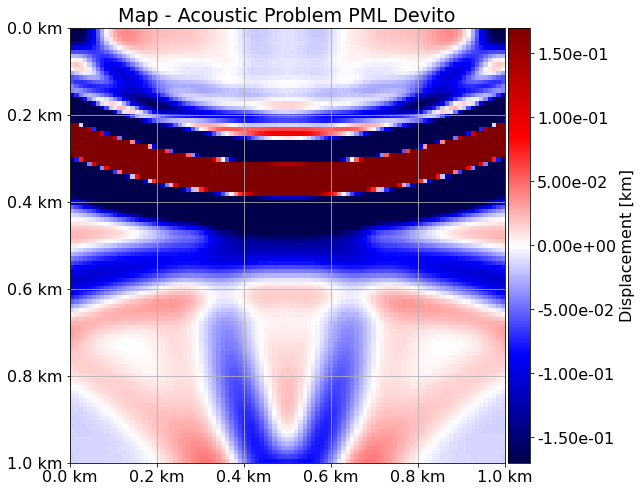

In [47]:
# NBVAL_IGNORE_OUTPUT

graph2d(u.data[0,:,:])

The solution obtained here has a reduction in the noise when compared with the results displayed in the notebook <a href="01_introduction.ipynb">Introduction to Acoustic Problem</a>. We plot the result of the Receivers using the *graph2drec* routine.

In [48]:
def graph2drec(rec):    
        plot.figure()
        plot.figure(figsize=(16,8))
        fscaled = 1/10**(3)
        fscalet = 1/10**(3)
        scale   = np.amax(rec[:,npmlx:-npmlx])/10.
        extent  = [fscaled*x0pml,fscaled*x1pml, fscalet*tn, fscalet*t0]
        fig = plot.imshow(rec[:,npmlx:-npmlx], vmin=-scale, vmax=scale, cmap=cm.seismic, extent=extent)
        plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
        plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
        plot.axis('equal')
        plot.title('Receivers Signal Profile with PML - Devito')
        ax = plot.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plot.colorbar(fig, cax=cax, format='%.2e')
        plot.show()

<Figure size 576x432 with 0 Axes>

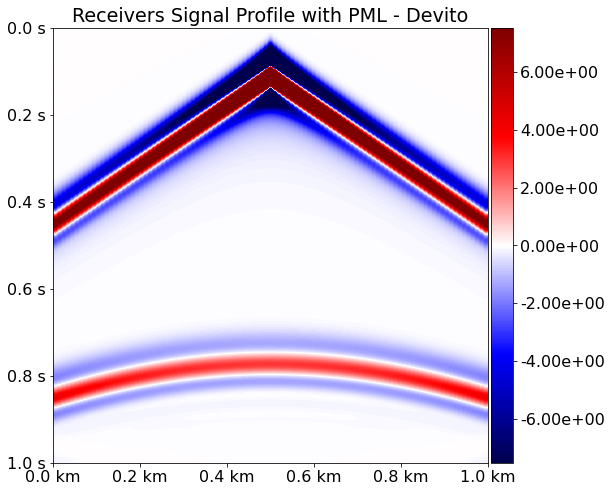

In [49]:
# NBVAL_IGNORE_OUTPUT

graph2drec(rec.data)

In [50]:
assert np.isclose(np.linalg.norm(rec.data), 990, rtol=1)

# 3.8 - Conclusions

We conclude our small approach to the PML method applied to the Acoustic Problem, including simulations in the Devito environment for this problem. In this study, we can see that:

- When we use the PML strategy to reduce reflections at the end of the simulation, we observe a reduction in the amount of noise in our image when compared to the results of the notebook <a href="01_introduction.ipynb">Introduction to Acoustic Problem</a>.

# 3.9 - References

- Berenger, J.-P. (1994). "A perfectly matched layer for the absorption of electromagnetic waves", Journal of Computational Physics, 114(2), 185-200. DOI: 10.1006/jcph.1994.1159. <a href="https://www.sciencedirect.com/science/article/pii/S0021999184711594">Reference Link.</a>

- Grote, M. J. and Sim, I. (2010). "Efficient PML for the wave equation", arXiv preprint arXiv:1001.0319. <a href="https://arxiv.org/abs/1001.0319">Reference Link.</a>